<a href="https://colab.research.google.com/github/kodenshacho/ColaboratoryNotes/blob/main/multi_peek_argrelmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

In [ ]:

# 仮のXRDスペクトルを生成するためのパラメータ
amplitude1 = 10
mean1 = 30
sigma1 = 2
amplitude2 = 15
mean2 = 50
sigma2 = 3
amplitude3 = 5
mean3 = 70
sigma3 = 1

# 仮のXRDスペクトルを生成
x = np.linspace(0, 100, 1000)
y = amplitude1 * norm.pdf(x, mean1, sigma1) + amplitude2 * norm.pdf(x, mean2, sigma2) + amplitude3 * norm.pdf(x, mean3, sigma3)

In [ ]:

# XRDスペクトルからピークを検出
peaks = argrelmax(y, order=3)

peaks_x = x[peaks]
peaks_y = y[peaks]

# XRDスペクトルのピークをフィッティングするためのGMMモデルを作成
model = GaussianMixture(n_components=len(peaks))

# モデルをフィッティング
model.fit(peaks_x.reshape(-1, 1))

GaussianMixture()

In [ ]:

# Plot the XRD spectrum with the fitted peaks
plt.plot(x, y, label="XRD spectrum")
for mean, cov in zip(gmm.means_.flatten(), gmm.covariances_.flatten()):
    y_peak = np.exp(-0.5 * ((x - mean) / np.sqrt(cov))**2)
    plt.plot(x, y_peak, linestyle="dashed", label=f"Peak at {mean:.2f}")
plt.legend()
plt.show()

In [ ]:

import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [ ]:

# Generate a synthetic XRD spectrum with 3 peaks
np.random.seed(42)
x = np.linspace(0, 10, 1000)
y = np.exp(-0.5 * ((x - 3) / 1)**2) + np.exp(-0.5 * ((x - 6) / 2)**2) + np.exp(-0.5 * ((x - 9) / 0.5)**2)
y += np.random.normal(0, 0.1, y.shape)

In [ ]:

# Fit the XRD spectrum with a Gaussian mixture model with 3 components
gmm = GaussianMixture(n_components=3)
gmm.fit(x.reshape(-1, 1), y)

GaussianMixture(n_components=3)

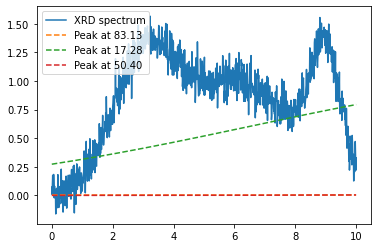

In [ ]:

# Plot the XRD spectrum with the fitted peaks
plt.plot(x, y, label="XRD spectrum")
for mean, cov in zip(gmm.means_.flatten(), gmm.covariances_.flatten()):
    y_peak = np.exp(-0.5 * ((x - mean) / np.sqrt(cov))**2)
    plt.plot(x, y_peak, linestyle="dashed", label=f"Peak at {mean:.2f}")
plt.legend()
plt.show()

In [ ]:

from scipy.signal import argrelmax

# Find the relative maxima of the XRD spectrum
# Find the relative maxima of the XRD spectrum
maxima_indices = argrelmax(y)[0]
maxima = x[maxima_indices]

# Plot the XRD spectrum with the detected peaks
plt.plot(x, y, label="XRD spectrum")
for peak in maxima:
    plt.plot(x, np.maximum(y, 0) * (x == peak), linestyle="dashed", label=f"Peak at {peak:.2f}")
plt.legend()
plt.show()

In [ ]:

# Fit the XRD spectrum with a Gaussian mixture model
gmm = GaussianMixture(n_components=len(maxima))
gmm.fit(x.reshape(-1, 1), y)

# Plot the XRD spectrum with the fitted peaks
plt.plot(x, y, label="XRD spectrum")
for mean, cov in zip(gmm.means_.flatten(), gmm.covariances_.flatten()):
    y_peak = np.exp(-0.5 * ((x - mean) / np.sqrt(cov))**2)
    plt.plot(x, y_peak, linestyle="dashed", label=f"Peak at {mean:.2f}")
plt.legend()
plt.show()

In [ ]:

import numpy as np

def load_data():
    # Generate fake energy data
    energies = np.linspace(0, 10, 1000)
    
    # Generate fake intensity data using a combination of Gaussian functions
    intensities = 0.5 * np.exp(-0.5 * ((energies - 2) / 0.5) ** 2)
    intensities += 0.25 * np.exp(-0.5 * ((energies - 5) / 0.75) ** 2)
    intensities += 0.25 * np.exp(-0.5 * ((energies - 8) / 1.0) ** 2)
    
    return energies, intensities

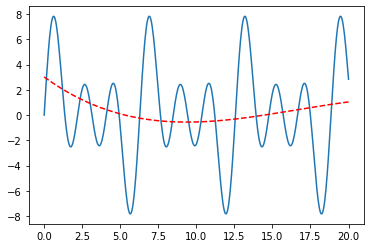

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate some fake XRD data with multiple overlapping peaks
x = np.linspace(0, 20, 500)
y = 2 * np.sin(x) + 3 * np.sin(2 * x) + 4 * np.sin(3 * x)

# Plot the XRD data
plt.plot(x, y)

# Create a baseline by fitting a polynomial to the data
coefficients = np.polyfit(x, y, deg=3)
baseline = np.polyval(coefficients, x)

# Plot the baseline
plt.plot(x, baseline, 'r--')

# Show the plot
plt.show()

In [ ]:

import numpy as np

# Generate some fake XRD data with multiple overlapping peaks
x = np.linspace(0, 20, 500)
y = 2 * np.sin(x) + 3 * np.sin(2 * x) + 4 * np.sin(3 * x)

# Create a baseline by fitting a polynomial to the data
coefficients = np.polyfit(x, y, deg=3)
baseline = np.polyval(coefficients, x)

# Find the peak values by subtracting the baseline from the data
peaks = y - baseline

# Find the indices of the local maxima in the peaks array
peak_indices = np.where(np.r_[True, peaks[1:] > peaks[:-1]] & np.r_[peaks[:-1] > peaks[1:], True])[0]

# Print the peak values and their indices
print("Peak values:", peaks[peak_indices])
print("Peak indices:", peak_indices)

Peak values: [5.34317288 1.32188584 2.26171286 8.19248224 2.98165506 3.02189235
 8.05259626 2.28594203 1.99839517 6.87440015]
Peak indices: [ 16  67 114 172 223 270 329 380 427 486]


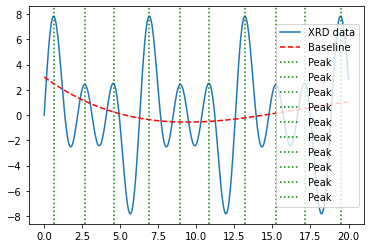

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate some fake XRD data with multiple overlapping peaks
x = np.linspace(0, 20, 500)
y = 2 * np.sin(x) + 3 * np.sin(2 * x) + 4 * np.sin(3 * x)

# Create a baseline by fitting a polynomial to the data
coefficients = np.polyfit(x, y, deg=3)
baseline = np.polyval(coefficients, x)

# Find the peak values by subtracting the baseline from the data
peaks = y - baseline

# Find the indices of the local maxima in the peaks array
peak_indices = np.where(np.r_[True, peaks[1:] > peaks[:-1]] & np.r_[peaks[:-1] > peaks[1:], True])[0]

# Plot the XRD data and the baseline
plt.plot(x, y, label="XRD data")
plt.plot(x, baseline, 'r--', label="Baseline")

# Plot the peaks as vertical lines
for peak_index in peak_indices:
  plt.axvline(x=x[peak_index], color='g', linestyle=':', label="Peak")

# Add a legend and show the plot
plt.legend()
plt.show()

[7.82598002 2.42667964 2.50455586 7.82977868 2.43047457 2.52054926
 7.83330778 2.43198837 2.51902081 7.83268287]


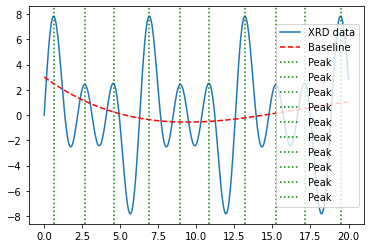

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelmax

# Generate some fake XRD data with multiple overlapping peaks
x = np.linspace(0, 20, 500)
y = 2 * np.sin(x) + 3 * np.sin(2 * x) + 4 * np.sin(3 * x)

# Create a baseline by fitting a polynomial to the data
coefficients = np.polyfit(x, y, deg=3)
baseline = np.polyval(coefficients, x)

# Find the peak values by subtracting the baseline from the data
peaks = y - baseline

# Use the argrelmax function to find the local maxima
peak_indices = argrelmax(peaks, order=5)[0]

print(y[peak_indices])

# Plot the XRD data and the baseline
plt.plot(x, y, label="XRD data")
plt.plot(x, baseline, 'r--', label="Baseline")

# Plot the peaks as vertical lines
for peak_index in peak_indices:
  plt.axvline(x=x[peak_index], color='g', linestyle=':', label="Peak")

# Add a legend and show the plot
plt.legend()
plt.show()

In [ ]:

import numpy as np

# Define the peak positions and intensities for each element
peak_positions = {
  'Ca': [10, 15],
  'Mg': [5, 8],
  'Al': [12, 17],
  'Si': [3, 7],
  'Fe': [9, 14]
}
peak_intensities = {
  'Ca': [2, 4],
  'Mg': [1, 3],
  'Al': [3, 5],
  'Si': [4, 6],
  'Fe': [5, 7]
}

# Define the observed peak values
observed_peak_values = [3, 5, 7, 9, 10, 12, 14, 15, 17]

# Calculate the probability of each element based on the observed peak values
element_probabilities = {}
for element, positions in peak_positions.items():
  # Calculate the probability of observing each peak value for this element
  peak_probabilities = []
  for value in observed_peak_values:
    # Find the nearest peak position
    nearest_position = min(positions, key=lambda x: abs(x - value))
    index = positions.index(nearest_position)
    # Calculate the probability based on the intensity of the nearest peak
    probability = 1 / peak_intensities[element][index]
    peak_probabilities.append(probability)
  # Calculate the overall probability for this element
  element_probabilities[element] = np.prod(peak_probabilities)

# Normalize the element probabilities
total_probability = sum(element_probabilities.values())
for element, probability in element_probabilities.items():
  element_probabilities[element] = probability / total_probability

# Print the element probabilities
print("Element probabilities:")
for element, probability in element_probabilities.items():
  print(f"{element}: {probability:.2f}")

Element probabilities:
Ca: 0.34
Mg: 0.64
Al: 0.03
Si: 0.00
Fe: 0.00
